In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('symptom_Description.csv')  # Replace with your file path
print(f"Dataset shape: {df.shape}")

# Verify column names and data types
print("\nFirst 3 entries:")
print(df.head(3))

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nNumber of unique diseases:", df['Disease'].nunique())
print("Average description length:", df['Description'].str.len().mean())

Dataset shape: (41, 2)

First 3 entries:
         Disease                                        Description
0  Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1        Malaria  An infectious disease caused by protozoan para...
2        Allergy  An allergy is an immune system response to a f...

Missing values per column:
Disease        0
Description    0
dtype: int64

Number of unique diseases: 41
Average description length: 251.390243902439


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

# Apply cleaning
df['Cleaned_Description'] = df['Description'].apply(clean_text)

# Verify cleaning
print("\nBefore cleaning:", df['Description'].iloc[0])
print("After cleaning:", df['Cleaned_Description'].iloc[0])


Before cleaning: An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
After cleaning: adverse drug reaction adr injury caused taking medication adrs may occur following single dose prolonged administration drug result combination two drug


[nltk_data] Downloading package stopwords to C:\Users\MK
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MK
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


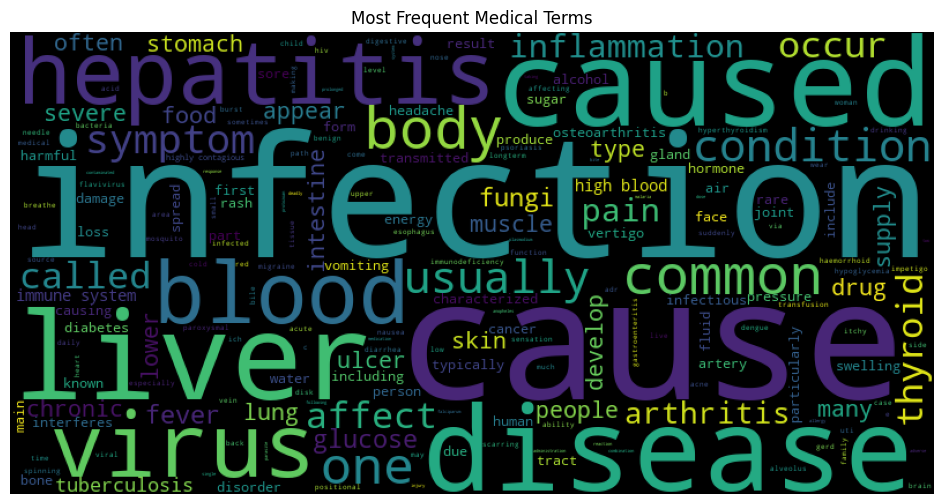

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(df['Cleaned_Description'])
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Medical Terms')
plt.show()


In [13]:
print(f"Total diseases: {df['Disease'].nunique()}")
print(f"Average description length: {df['Description'].str.len().mean():.0f} characters")
print(f"Longest description: {df['Description'].str.len().max()} chars")
print(f"Shortest description: {df['Description'].str.len().min()} chars")

Total diseases: 41
Average description length: 251 characters
Longest description: 318 chars
Shortest description: 152 chars


[nltk_data] Downloading package punkt to C:\Users\MK
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\MK 10\AppData\Local\Temp\ipykernel_25672\3338367411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in common_words],


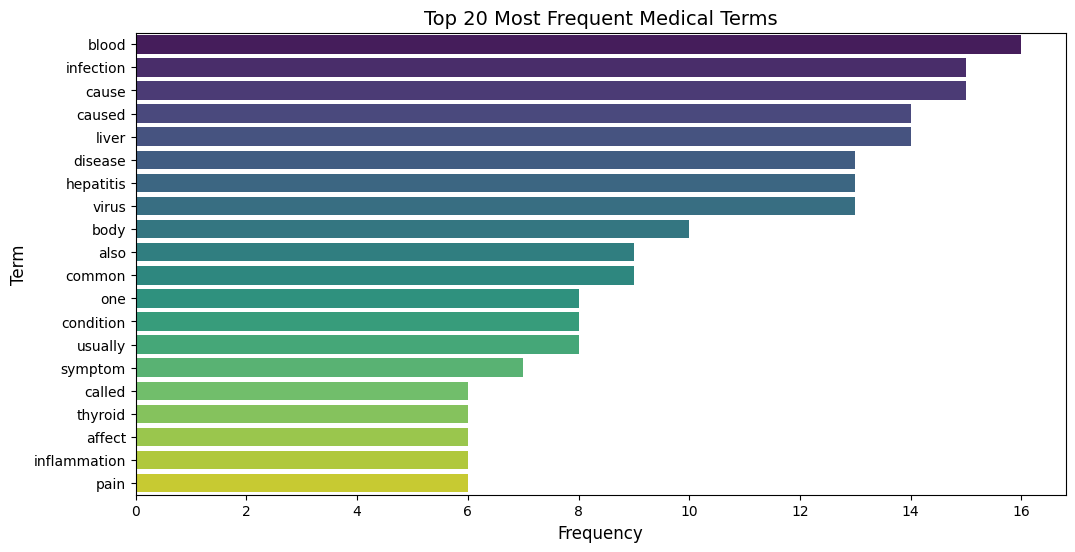

In [18]:
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenize all descriptions
all_words = []
for desc in df['Cleaned_Description']:
    all_words.extend(word_tokenize(desc))

# Get top 20 medical terms
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

plt.figure(figsize=(12,6))
sns.barplot(x=[w[1] for w in common_words], 
            y=[w[0] for w in common_words], 
            palette='viridis')
plt.title('Top 20 Most Frequent Medical Terms', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Term', fontsize=12)
plt.show()

C:\Users\MK 10\AppData\Local\Temp\ipykernel_25672\95558230.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in words_freq],


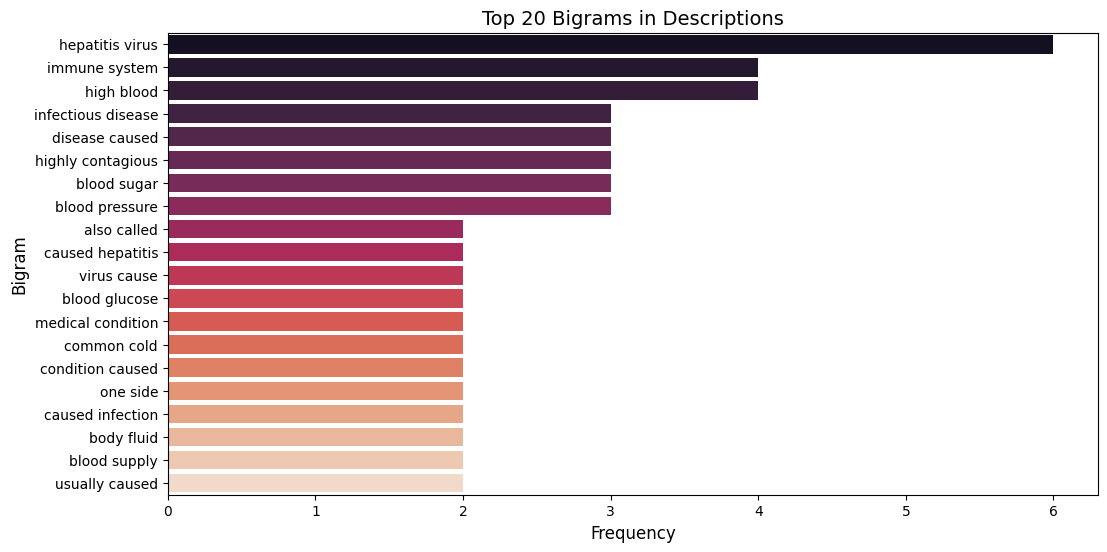

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Get top bigrams
cv = CountVectorizer(ngram_range=(2,2), max_features=20)
bigrams = cv.fit_transform(df['Cleaned_Description'])
sum_words = bigrams.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,6))
sns.barplot(x=[w[1] for w in words_freq], 
            y=[w[0] for w in words_freq], 
            palette='rocket')
plt.title('Top 20 Bigrams in Descriptions', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigram', fontsize=12)
plt.show()

In [42]:
from nltk.corpus import wordnet
import random

# Synonym Replacement
def replace_synonyms(text):
    words = text.split()
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            # Replace with a random synonym
            augmented_words.append(random.choice(synonyms).lemmas()[0].name().replace('_', ' '))
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

In [48]:
from deep_translator import GoogleTranslator

def back_translate(text, src='en', intermediate='fr'):
    try:
        # Translate to intermediate language
        translated = GoogleTranslator(source=src, target=intermediate).translate(text)
        # Translate back to English
        back_translated = GoogleTranslator(source=intermediate, target=src).translate(translated)
        return back_translated
    except Exception as e:
        print(f"Translation error: {e}")
        return text

In [49]:
import random

def random_insertion(text, n=1):
    words = text.split()
    for _ in range(n):
        new_word = random.choice(words)  # Choose a random word from the text
        insert_idx = random.randint(0, len(words))
        words.insert(insert_idx, new_word)
    return ' '.join(words)

In [50]:
# Random Deletion
def random_deletion(text, p=0.1):
    words = text.split()
    if len(words) == 1:
        return text  # Return if there's only one word
    words = [word for word in words if random.random() > p]
    return ' '.join(words)

In [51]:
import random

def shuffle_sentences(text):
    sentences = text.split('. ')
    random.shuffle(sentences)
    return '. '.join(sentences)

In [52]:
def augment_text(text):
    augmented_texts = []
    
    # Apply synonym replacement
    augmented_texts.append(replace_synonyms(text))
    
    # Apply back translation
    augmented_texts.append(back_translate(text))
    
    # Apply random insertion
    augmented_texts.append(random_insertion(text))
    
    # Apply random deletion
    augmented_texts.append(random_deletion(text))
    
    # Apply sentence shuffling (if applicable)
    if '. ' in text:
        augmented_texts.append(shuffle_sentences(text))
    
    return augmented_texts

In [56]:
augmented_data = []

for _, row in df.iterrows():
    disease = row['Disease']
    description = row['Description']
    
    # Generate augmented descriptions
    augmented_descriptions = augment_text(description)
    
    # Add original and augmented data to the list
    for desc in augmented_descriptions:
        augmented_data.append({'Disease': disease, 'Description': desc})

# Create a new DataFrame with augmented data
augmented_df = pd.DataFrame(augmented_data)

# Combine original and augmented data
final_df = pd.concat([df[['Disease', 'Description']], augmented_df], ignore_index=True)

In [57]:
final_df

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...
...,...,...
239,Tuberculosis,tuberculosis (TB) be Associate in Nursing infe...
240,Tuberculosis,Tuberculosis (TB) is an infectious disease gen...
241,Tuberculosis,Tuberculosis (TB) is an infectious disease usu...
242,Tuberculosis,Tuberculosis (TB) is infectious disease usuall...


In [58]:
final_df.to_csv('augmented_disease_data.csv', index=False)

In [59]:
# Basic information
print("Dataset Shape:", final_df.shape)
print("\nColumns:", final_df.columns)
print("\nData Types:\n", final_df.dtypes)

Dataset Shape: (244, 2)

Columns: Index(['Disease', 'Description'], dtype='object')

Data Types:
 Disease        object
Description    object
dtype: object


In [60]:
# Check for missing values
print("\nMissing Values:\n", final_df.isnull().sum())


Missing Values:
 Disease        0
Description    0
dtype: int64



Number of Unique Diseases: 41

Disease Counts:
 Disease
Drug Reaction                              6
Urinary tract infection                    6
AIDS                                       6
Paralysis (brain hemorrhage)               6
Typhoid                                    6
Hepatitis B                                6
Fungal infection                           6
Hepatitis C                                6
Migraine                                   6
Bronchial Asthma                           6
Alcoholic hepatitis                        6
Jaundice                                   6
Hepatitis E                                6
Dengue                                     6
Hepatitis D                                6
Heart attack                               6
Pneumonia                                  6
Arthritis                                  6
Gastroenteritis                            6
Varicose veins                             6
Hyperthyroidism                            

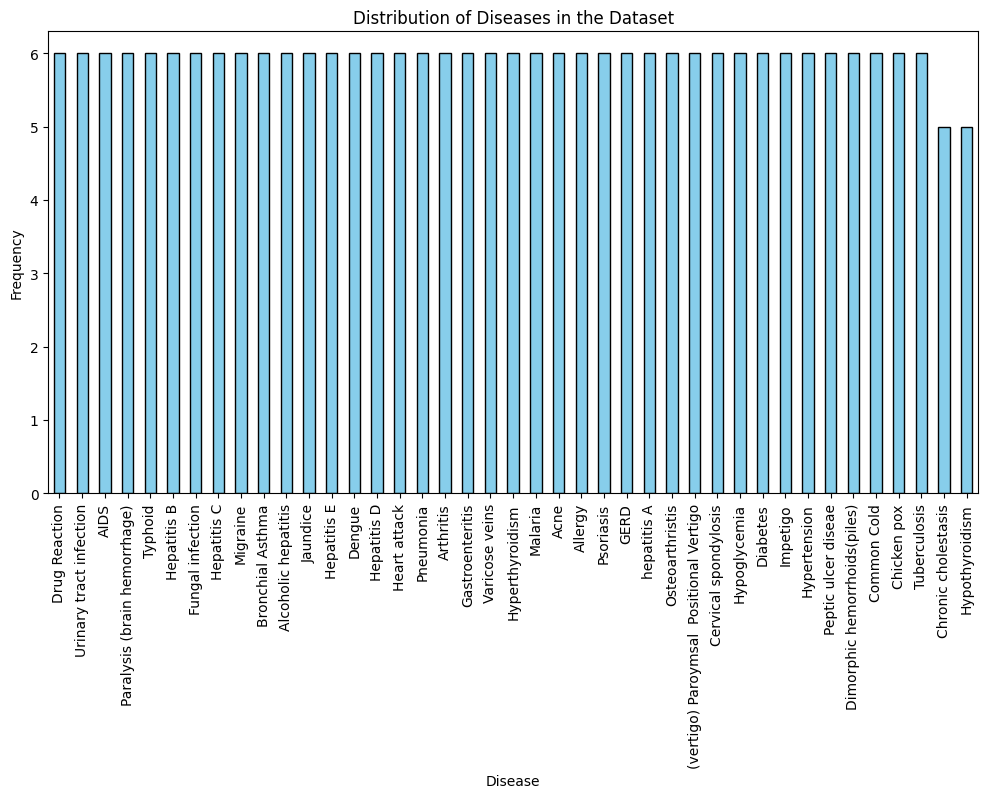

In [61]:
# Count unique diseases
unique_diseases = final_df['Disease'].nunique()
print(f"\nNumber of Unique Diseases: {unique_diseases}")

# Count occurrences of each disease
disease_counts = final_df['Disease'].value_counts()
print("\nDisease Counts:\n", disease_counts)

# Plot the distribution of diseases
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
disease_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Diseases in the Dataset')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Description Length Statistics:
 count    244.000000
mean     255.188525
std       44.662397
min      151.000000
25%      229.000000
50%      254.000000
75%      283.000000
max      402.000000
Name: Desc_Length, dtype: float64


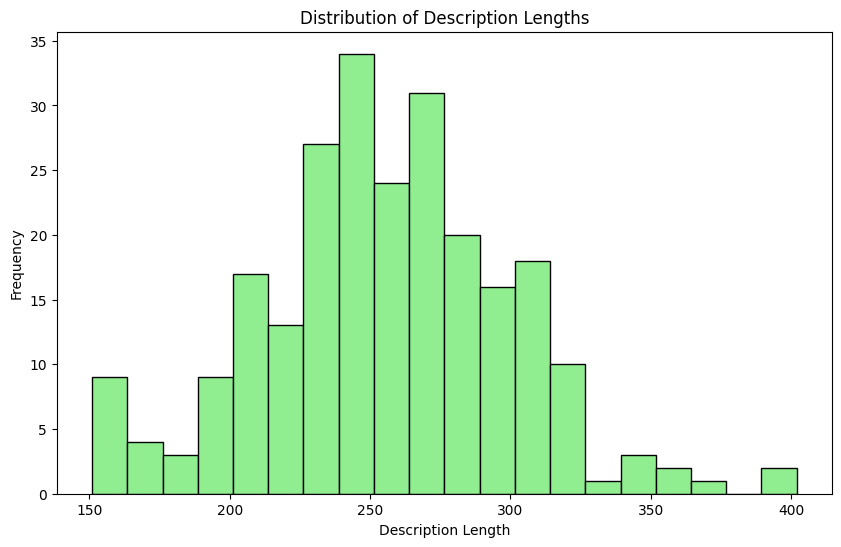

In [62]:
# Add a column for description length
final_df['Desc_Length'] = final_df['Description'].apply(len)

# Summary statistics for description length
print("\nDescription Length Statistics:\n", final_df['Desc_Length'].describe())

# Plot the distribution of description lengths
plt.figure(figsize=(10, 6))
plt.hist(final_df['Desc_Length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()


Top 20 Most Common Words:
 [('blood', 85), ('hepatitis', 78), ('caused', 69), ('liver', 67), ('cause', 66), ('infection', 61), ('common', 49), ('one', 49), ('disease', 47), ('virus', 46), ('also', 44), ('condition', 33), ('usually', 33), ('inflammation', 32), ('called', 29), ('many', 25), ('pain', 25), ('immune', 23), ('causes', 22), ('often', 22)]


[nltk_data] Downloading package stopwords to C:\Users\MK
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


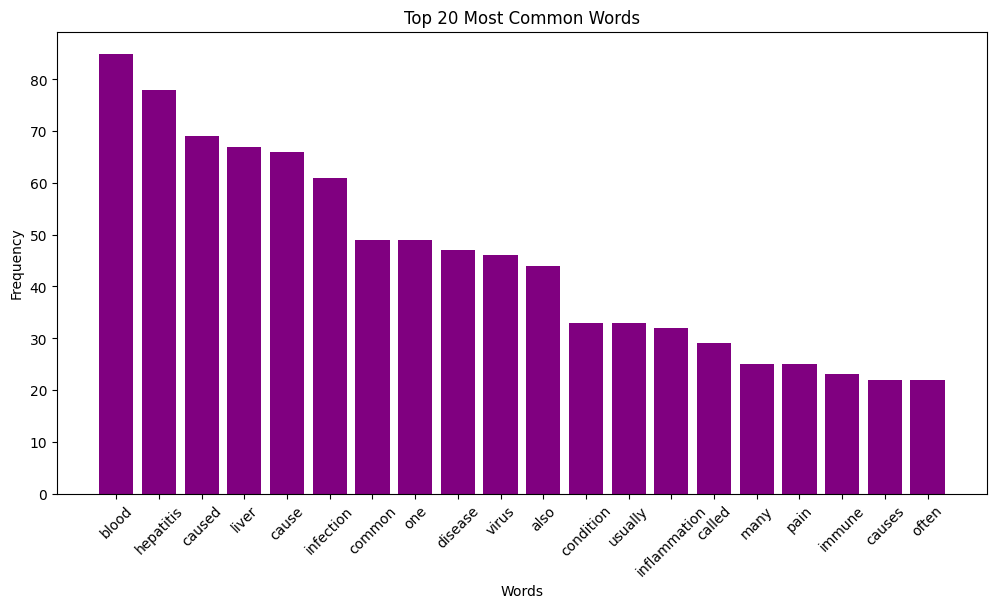

In [64]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')

# Tokenize and count words
all_words = ' '.join(final_df['Description']).lower().split()
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word not in stop_words]

# Get the most common words
word_counts = Counter(filtered_words)
print("\nTop 20 Most Common Words:\n", word_counts.most_common(20))

# Plot the top 20 most common words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='purple')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [65]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

[nltk_data] Downloading package punkt to C:\Users\MK
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MK
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
# Apply text cleaning
final_df['Cleaned_Description'] = final_df['Description'].apply(clean_text)

# Display the cleaned data
print(final_df[['Disease', 'Cleaned_Description']].head())

          Disease                                Cleaned_Description
0   Drug Reaction  adverse drug reaction adr injury caused taking...
1         Malaria  infectious disease caused protozoan parasite p...
2         Allergy  allergy immune system response foreign substan...
3  Hypothyroidism  hypothyroidism also called underactive thyroid...
4       Psoriasis  psoriasis common skin disorder form thick red ...


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

# Fit and transform the preprocessed descriptions
X = tfidf.fit_transform(final_df['Cleaned_Description']).toarray()

# Extract target labels (disease names)
y = final_df['Disease']

In [68]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 195
Testing samples: 49


In [69]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         4
                              Arthritis       1.00      1.00      1.00         2
                       Bronchial Asthma       1.00      1.00      1.00         2
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold       1.00      1.00      1.00         2
                                 Dengue       1.00     

In [71]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'disease_prediction_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [77]:
# Load the model and vectorizer
loaded_model = joblib.load('disease_prediction_model.pkl')
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')

def predict_and_sort_diseases(description):
    # Preprocess the input
    preprocessed_input = clean_text(description)
    
    # Transform the input using the loaded TF-IDF vectorizer
    input_vector = loaded_tfidf.transform([preprocessed_input])
    
    # Get the predicted probabilities for all diseases
    probabilities = loaded_model.predict_proba(input_vector)[0]
    
    # Get the list of diseases (classes)
    diseases = loaded_model.classes_
    
    # Combine diseases and their probabilities into a list of tuples
    disease_probabilities = list(zip(diseases, probabilities))
    
    # Sort the list by probabilities in descending order
    sorted_diseases = sorted(disease_probabilities, key=lambda x: x[1], reverse=True)
    
    return sorted_diseases

# Example input description
new_description = "A condition where the thyroid gland does not produce enough hormones."

# Predict and sort diseases
sorted_diseases = predict_and_sort_diseases(new_description)

# Display the sorted diseases with probabilities
for disease, prob in sorted_diseases:
    print(f" {disease}, {prob:.4f}")

 Hypothyroidism, 0.3600
 Hyperthyroidism, 0.1300
 Diabetes, 0.0400
 Hypertension, 0.0400
 Peptic ulcer diseae, 0.0400
 Arthritis, 0.0300
 Chicken pox, 0.0300
 Dimorphic hemorrhoids(piles), 0.0300
 Hepatitis D, 0.0300
 (vertigo) Paroymsal  Positional Vertigo, 0.0200
 AIDS, 0.0200
 Acne, 0.0200
 Bronchial Asthma, 0.0200
 Chronic cholestasis, 0.0200
 Common Cold, 0.0200
 GERD, 0.0200
 Tuberculosis, 0.0200
 Typhoid, 0.0200
 Urinary tract infection, 0.0200
 Alcoholic hepatitis, 0.0100
 Dengue, 0.0100
 Fungal infection, 0.0100
 Hepatitis B, 0.0100
 Paralysis (brain hemorrhage), 0.0100
 Psoriasis, 0.0100
 Varicose veins, 0.0100
 Allergy, 0.0000
 Cervical spondylosis, 0.0000
 Drug Reaction, 0.0000
 Gastroenteritis, 0.0000
 Heart attack, 0.0000
 Hepatitis C, 0.0000
 Hepatitis E, 0.0000
 Hypoglycemia, 0.0000
 Impetigo, 0.0000
 Jaundice, 0.0000
 Malaria, 0.0000
 Migraine, 0.0000
 Osteoarthristis, 0.0000
 Pneumonia, 0.0000
 hepatitis A, 0.0000


In [79]:
# Load the model and vectorizer
loaded_model = joblib.load('disease_prediction_model.pkl')
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')

def predict_and_sort_diseases(description):
    # Preprocess the input
    preprocessed_input = clean_text(description)
    
    # Transform the input using the loaded TF-IDF vectorizer
    input_vector = loaded_tfidf.transform([preprocessed_input])
    
    # Get the predicted probabilities for all diseases
    probabilities = loaded_model.predict_proba(input_vector)[0]
    
    # Get the list of diseases (classes)
    diseases = loaded_model.classes_
    
    # Combine diseases and their probabilities into a list of tuples
    disease_probabilities = list(zip(diseases, probabilities))
    
    # Sort the list by probabilities in descending order
    sorted_diseases = sorted(disease_probabilities, key=lambda x: x[1], reverse=True)
    
    return sorted_diseases

# Example input description
new_description = "Anopheles mosquito or via a tainted needle or blood transfusion. Among the types, Falciparum malaria is considered the most lethal."

# Predict and sort diseases
sorted_diseases = predict_and_sort_diseases(new_description)

# Display the sorted diseases with probabilities
for disease, prob in sorted_diseases:
    print(f" {disease}, {prob:.4f}")

 Malaria, 0.4300
 Hepatitis C, 0.0700
 Arthritis, 0.0500
 Dengue, 0.0400
 Peptic ulcer diseae, 0.0400
 GERD, 0.0300
 Hypertension, 0.0300
 hepatitis A, 0.0300
 (vertigo) Paroymsal  Positional Vertigo, 0.0200
 Common Cold, 0.0200
 Fungal infection, 0.0200
 Hepatitis B, 0.0200
 Hypothyroidism, 0.0200
 Paralysis (brain hemorrhage), 0.0200
 Pneumonia, 0.0200
 Urinary tract infection, 0.0200
 Varicose veins, 0.0200
 Alcoholic hepatitis, 0.0100
 Chicken pox, 0.0100
 Chronic cholestasis, 0.0100
 Diabetes, 0.0100
 Dimorphic hemorrhoids(piles), 0.0100
 Heart attack, 0.0100
 Hepatitis D, 0.0100
 Migraine, 0.0100
 Psoriasis, 0.0100
 Typhoid, 0.0100
 AIDS, 0.0000
 Acne, 0.0000
 Allergy, 0.0000
 Bronchial Asthma, 0.0000
 Cervical spondylosis, 0.0000
 Drug Reaction, 0.0000
 Gastroenteritis, 0.0000
 Hepatitis E, 0.0000
 Hyperthyroidism, 0.0000
 Hypoglycemia, 0.0000
 Impetigo, 0.0000
 Jaundice, 0.0000
 Osteoarthristis, 0.0000
 Tuberculosis, 0.0000
